# How are different characteristics of Business affect the average DCA loan amount? 
---------------------------------

In [ ]:
##  Table of Contents 
### 1. [Introduction](#Introduction)
### 2. [Data Cleaning and Summaries](#data_cleaning)
### 3. [Summary Statistics Tables](#summary_statistics_tables)
### 4. [Plots, Histograms and Figures ](#plots_and_figures)
### 5. [Conclusion](#Conclusion)     
### 6. [Weakness and Next steps](#final_paragraph)

----------------------------------------------------------------------------------------------

## Introduction
----------------------------------

## Data Cleaning and Summaries  <a name="data_cleaning"></a>

In [495]:
# Workspace Setup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [457]:
DCA_loan_data = pd.read_csv('Raw_Data.csv') # import raw DCA loan dataset
                                            # from local directory

DCA_loan_data = DCA_loan_data[['Amount (USD)', 'Business Sector', 
                               'Is Woman Owned?', 'Is First Time Borrower?', 
                               'Business Size']] # select the columns according 
                                                 # to the research topic
DCA_loan_data = DCA_loan_data[~DCA_loan_data['Is Woman Owned?']
                              .isin([4,19,86,123,4732,21566])] 
# remove rows which include values which are not 0 or 1

DCA_loan_data = DCA_loan_data[~DCA_loan_data['Is First Time Borrower?']
                              .isin([21,26,170,390])]
# remove rows which include values which are not 0 or 1

DCA_loan_data

,Amount (USD),Business Sector,Is Woman Owned?,Is First Time Borrower?,Business Size
0,9.872727e+05,NaN,0,1,>100
1,1.974545e+06,NaN,0,0,>100
2,1.992565e+06,NaN,0,1,>100
3,1.000000e+06,NaN,0,0,>100
4,1.780000e+06,NaN,0,0,NaN
...,...,...,...,...,...
163790,5.949851e+04,Other Service,0,0,NaN
163791,6.799830e+04,Other Service,0,1,NaN
163792,6.374841e+04,Other Service,0,1,NaN
163793,4.674883e+04,Information & Communication Technologies,0,0,NaN


-------------------------------------

## Summary Statistics Tables <a name="summary_statistics_tables"></a>

In [458]:
des = DCA_loan_data.groupby('Is Woman Owned?').size()
des = pd.DataFrame(des)
des = des.rename(columns = {0:'Count'})
des

,Count
Is Woman Owned?,
0,134838
1,28951


In [459]:
des2 = DCA_loan_data.groupby('Is First Time Borrower?').size()
des2 = pd.DataFrame(des2)
des2 = des2.rename(columns = {0:'Count'})
des2

,Count
Is First Time Borrower?,
0,114264
1,49525


In [460]:
des3 = DCA_loan_data['Amount (USD)'].mean()
des4 = DCA_loan_data['Amount (USD)'].std()
des5 = pd.DataFrame({'Mean':[des3], 'Standard Deviation':[des4]})
des5 = des5.rename(index = {0:'Amount (USD)'})
des5

,Mean,Standard Deviation
Amount (USD),11475.042246,302888.787296


In [461]:
des6 = DCA_loan_data.groupby('Business Size').size()
des6 = pd.DataFrame(des6)
des6 = des6.rename(columns = {0:'Count'})
des6 = des6.reindex(['1--5','6--10', '11--50', '51--100', '>100'])
des6

,Count
Business Size,
1--5,26770
6--10,1647
11--50,2274
51--100,221
>100,157


In [462]:
des7 = DCA_loan_data.groupby('Business Sector').size()
des7 = pd.DataFrame(des7)
des7 = des7.rename(columns = {0:'Count'})
des7

,Count
Business Sector,
Agriculture,62818
Construction,302
Education,830
Energy,54
Fisheries/Aquaculture,800
Forestry/Wood,148
Health,774
Housing,61
Information & Communication Technologies,121


----------------------------------------------------

## Plots, Histograms and Figures <a name="plots_and_figures"></a>

Text(0.5, 0.98, '')

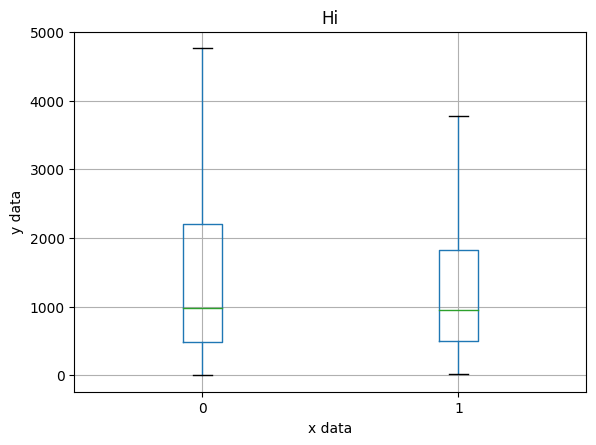

In [484]:
boxplt1 = DCA_loan_data.boxplot(column = 'Amount (USD)', 
                                by = 'Is Woman Owned?', showfliers=False)
#ax.suptitle('what is happening')
boxplt1.set_xlabel('x data')
boxplt1.set_ylabel('y data')
boxplt1.set_title('Hi')
plt.suptitle('')


Text(0.5, 0.98, '')

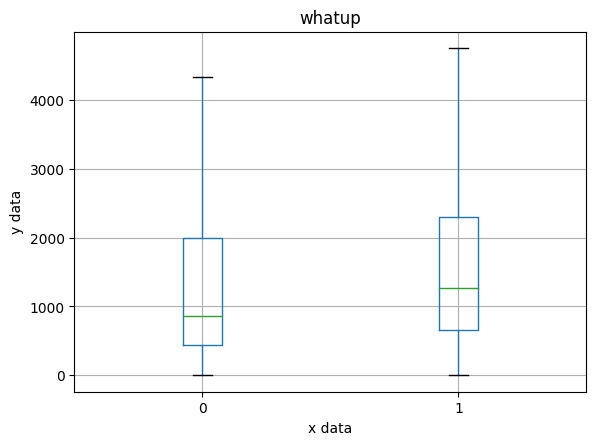

In [486]:
boxplt2 = DCA_loan_data.boxplot(column = 'Amount (USD)',
                                by = 'Is First Time Borrower?', showfliers = False)
boxplt2.set_xlabel('x data')
boxplt2.set_ylabel('y data')
boxplt2.set_title('whatup')
plt.suptitle('')

In [465]:
df_summary = df.groupby(['Is Woman Owned?', 
                         'Business Sector', 'Business Size']).agg(
    {'Amount (USD)': [np.sum, pd.Series.count, np.mean, np.std]})

df_summary.columns = ['Sum', 'Count', 'Mean', 'Std']
df_summary = df_summary.reindex(['1--5','6--10', '11--50', 
                                 '51--100', '>100'], level=2)
df_summary

Sum    Count  \
Is Woman Owned? Business Sector Business Size                          
0               Agriculture     1--5           7.753516e+07  12089.0   
                                6--10          3.533922e+07    526.0   
                                11--50         5.632304e+07    474.0   
                                51--100        1.449310e+07     43.0   
                                >100           4.027096e+07     49.0   
...                                                     ...      ...   
1               Trade/Commerce  51--100        1.147312e+06      7.0   
                                >100           1.062393e+06      7.0   
                Transportation  1--5           7.716843e+05     91.0   
                                6--10          1.280257e+05      5.0   
                                11--50         4.450519e+05      8.0   

                                                        Mean           Std  
Is Woman Owned? Business Sector Business Size                               
0               Agriculture     1--5             6413.695140  2.809130e+04  
                                6--10           67184.824029  4.799447e+05  
                                11--50         118824.977386  4.368721e+05  
                                51--100        337048.799258  3.774177e+05  
                                >100           821856.364545  1.681283e+06  
...                                                      ...           ...  
1               Trade/Commerce  51--100        163901.706443  1.907086e+05  
                                >100           151770.406129  1.047251e+05  
                Transportation  1--5             8480.046877  2.105120e+04  
                                6--10           25605.130520  1.553312e+04  
                                11--50          55631.493212  3.552454e+04  

[122 rows x 4 columns]

In [490]:
df2 = df_summary.groupby(['Business Sector', 
                          'Business Size'])['Mean'].diff()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2 = df2.drop('Is Woman Owned?', axis = 1)
df2 = df2.dropna()
df2.set_index('Business Sector', inplace=True)
df2=df2.rename(columns = {'Mean':'Difference in Mean Loan Amount(USD)'})
df2.head()

,Business Size,Difference in Mean Loan Amount(USD)
Business Sector,,
Agriculture,1--5,-3472.058089
Agriculture,6--10,-44487.974255
Agriculture,11--50,-90196.115685
Agriculture,51--100,-223580.041211
Agriculture,>100,-611471.977407


In [467]:
df_summary2 = df.groupby(['Is First Time Borrower?', 
                          'Business Sector', 'Business Size']).agg(
    {'Amount (USD)': [np.sum, pd.Series.count, np.mean, np.std]})

df_summary2.columns = ['Sum of Loan(USD)', 'Count', 
                       'Average Loan Amount(USD)', 'Standard Deviation(USD)']
df_summary2 = df_summary2.reindex(['1--5','6--10', 
                                   '11--50', '51--100', '>100'], level=2)
df_summary2

Sum of Loan(USD)  \
Is First Time Borrower? Business Sector Business Size                     
0                       Agriculture     1--5               4.296082e+07   
                                        6--10              1.345907e+07   
                                        11--50             2.325139e+07   
                                        51--100            1.043374e+07   
                                        >100               7.541738e+06   
...                                                                 ...   
1                       Trade/Commerce  >100               6.561210e+06   
                        Transportation  1--5               1.263330e+06   
                                        6--10              4.932286e+05   
                                        11--50             9.518717e+05   
                                        >100               1.460000e+05   

                                                        Count  \
Is First Time Borrower? Business Sector Business Size           
0                       Agriculture     1--5           5212.0   
                                        6--10           308.0   
                                        11--50          199.0   
                                        51--100          29.0   
                                        >100             25.0   
...                                                       ...   
1                       Trade/Commerce  >100              8.0   
                        Transportation  1--5             96.0   
                                        6--10            17.0   
                                        11--50           11.0   
                                        >100              1.0   

                                                       Average Loan Amount(USD)  \
Is First Time Borrower? Business Sector Business Size                             
0                       Agriculture     1--5                        8242.674046   
                                        6--10                      43698.272269   
                                        11--50                    116841.151511   
                                        51--100                   359784.248866   
                                        >100                      301669.533712   
...                                                                         ...   
1                       Trade/Commerce  >100                      820151.284850   
                        Transportation  1--5                       13159.689883   
                                        6--10                      29013.448671   
                                        11--50                     86533.788355   
                                        >100                      146000.000000   

                                                       Standard Deviation(USD)  
Is First Time Borrower? Business Sector Business Size                           
0                       Agriculture     1--5                      3.738971e+04  
                                        6--10                     1.595993e+05  
                                        11--50                    2.478670e+05  
                                        51--100                   3.933652e+05  
                                        >100                      3.352250e+05  
...                                                                        ...  
1                       Trade/Commerce  >100                      1.332829e+06  
                        Transportation  1--5                      2.648009e+04  
                                        6--10                     2.522947e+04  
                                        11--50                    5.422554e+04  
                                        >100                               NaN  

[127 rows x 4 columns]

In [491]:
df3 = df_summary2.groupby(['Business Sector', 
                           'Business Size'])['Average Loan Amount(USD)'].diff()
df3 = pd.DataFrame(df3)
df3 = df3.reset_index()
df3 = df3.drop('Is First Time Borrower?', axis = 1)
df3 = df3.dropna()
df3.set_index('Business Sector', inplace=True)
df3 = df3.rename(columns = {'Average Loan Amount(USD)':
                            'Difference in Mean Loan Amount(USD)'})
df3.head()

,Business Size,Difference in Mean Loan Amount(USD)
Business Sector,,
Agriculture,1--5,-3810.368240
Agriculture,6--10,35251.854347
Agriculture,11--50,-34825.185652
Agriculture,51--100,-161115.748117
Agriculture,>100,773714.798069


Text(0, 0.5, 'y data')

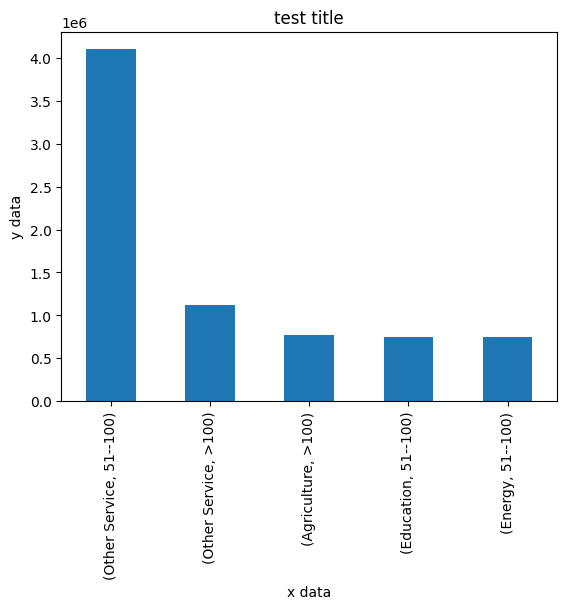

In [492]:
df3 = df3.reset_index()

ax1 = df3.set_index(['Business Sector', 
                     'Business Size'])['Difference in Mean Loan Amount(USD)'].nlargest(5).plot.bar()

ax1.set_title('test title')
ax1.set_xlabel('x data')
ax1.set_ylabel('y data')

Text(0, 0.5, 'y data')

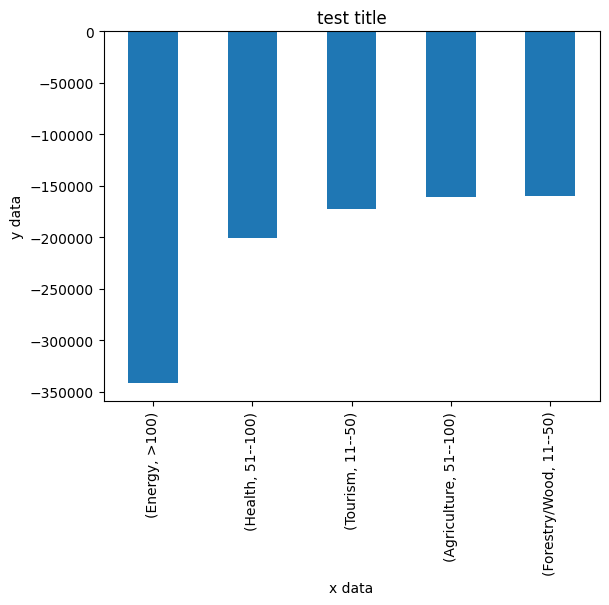

In [475]:
ax2 = df3.set_index(['Business Sector', 'Business Size'])['Difference in Mean Loan Amount(USD)'].nsmallest(5).plot.bar()
ax2.set_title('test title')
ax2.set_xlabel('x data')
ax2.set_ylabel('y data')

----------------------------------------------------

## Conclusion

## Weakness and Next steps <a name="final_paragraph"></a>